In [2]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from sim import simulate, simulate_with_true_anomalies, ewma_anomaly_detection

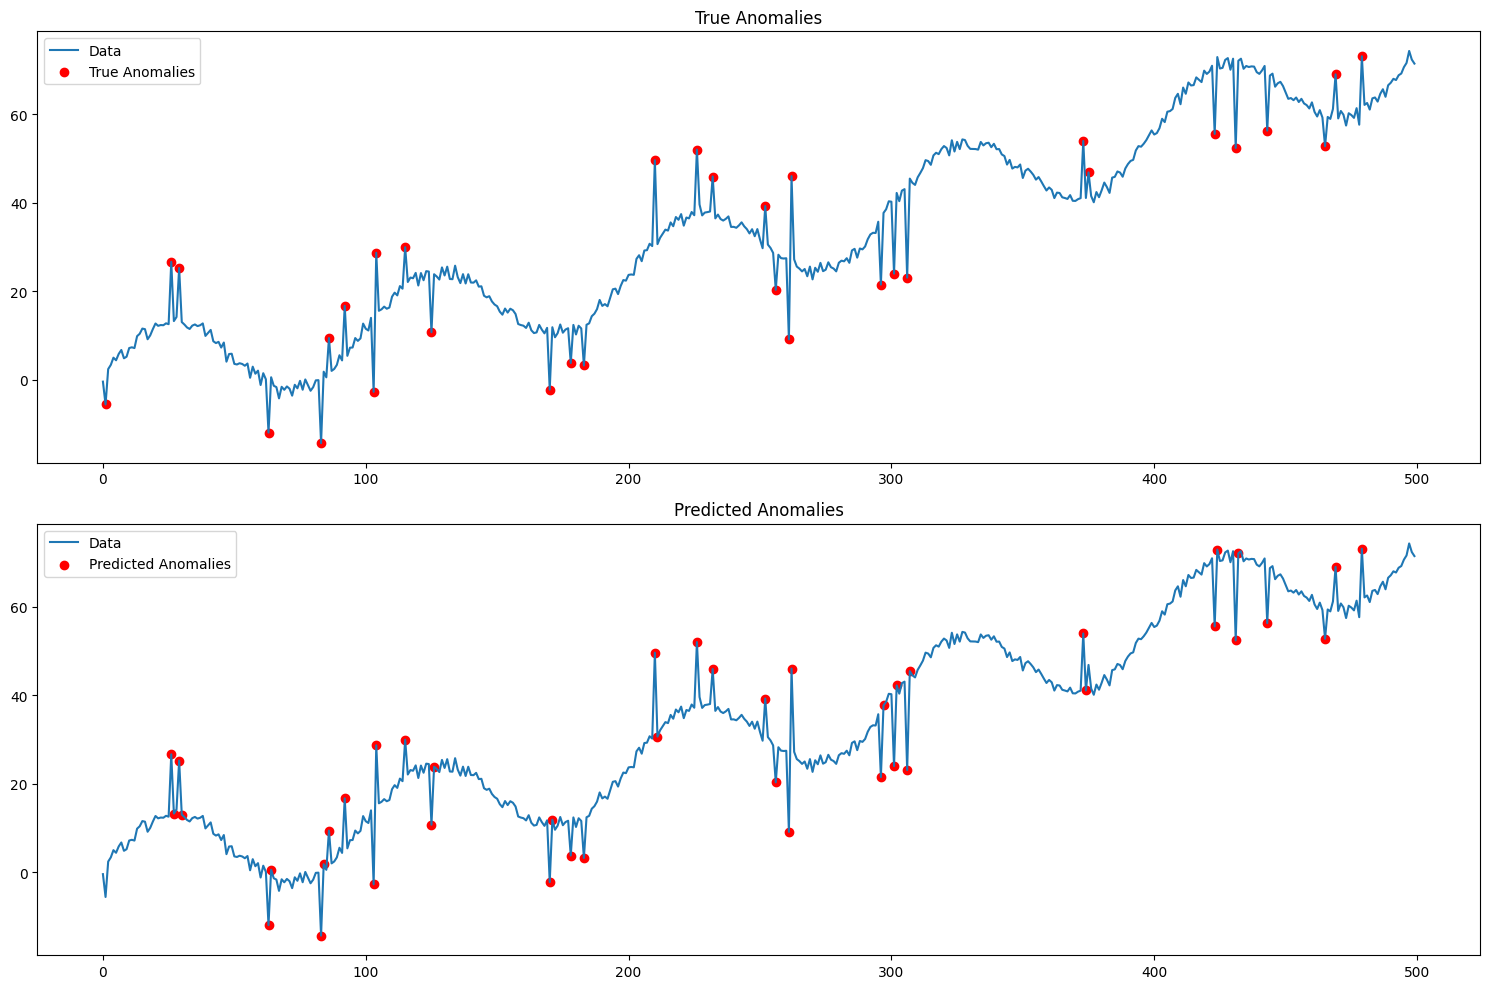

In [3]:
data_stream = simulate_with_true_anomalies()
data_points = []
true_anomalies = []
predicted_anomalies = []

prev_ewma = 0  # Initial EWMA value

for i in range(500):  # Generate 1000 data points
    value, is_anomaly = next(data_stream)
    data_points.append(value)
    if is_anomaly:
        true_anomalies.append((i, value))
    
    # Detect anomalies using EWMA
    is_predicted_anomaly, prev_ewma = ewma_anomaly_detection(value, prev_ewma)
    if is_predicted_anomaly:
        predicted_anomalies.append((i, value))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot true anomalies
axs[0].plot(data_points, label='Data')
if true_anomalies:
    true_anomalies_x, true_anomalies_y = zip(*true_anomalies)
    axs[0].scatter(true_anomalies_x, true_anomalies_y, c='red', label='True Anomalies')
axs[0].set_title('True Anomalies')
axs[0].legend()

# Plot predicted anomalies
axs[1].plot(data_points, label='Data')
if predicted_anomalies:
    predicted_anomalies_x, predicted_anomalies_y = zip(*predicted_anomalies)
    axs[1].scatter(predicted_anomalies_x, predicted_anomalies_y, c='red', label='Predicted Anomalies')
axs[1].set_title('Predicted Anomalies')
axs[1].legend()

plt.tight_layout()
plt.show()

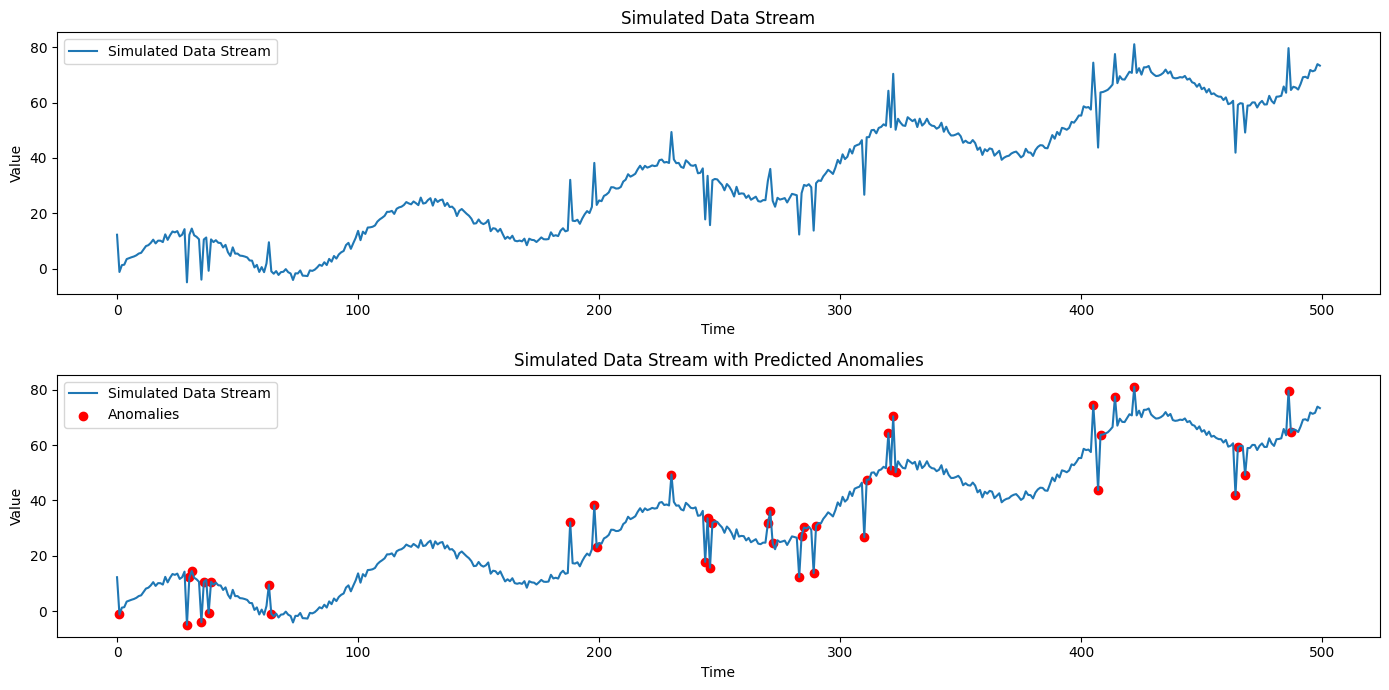

In [4]:
# Collect data points
simulator = simulate()
num_points = 500
data_stream = [next(simulator) for _ in range(num_points)]

# Detect anomalies
ewma = data_stream[0]
anomalies = []
for i in range(1, num_points):
    is_anomaly, ewma = ewma_anomaly_detection(data_stream[i], ewma)
    if is_anomaly:
        anomalies.append((i, data_stream[i]))

# Plot the simulated data stream
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data_stream, label='Simulated Data Stream')
plt.title('Simulated Data Stream')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot the data stream with anomalies labeled
plt.subplot(2, 1, 2)
plt.plot(data_stream, label='Simulated Data Stream')
if anomalies:
    anomaly_indices, anomaly_values = zip(*anomalies)
    plt.scatter(anomaly_indices, anomaly_values, color='red', label='Anomalies')
plt.title('Simulated Data Stream with Predicted Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()